# Time Series Forecasting- AR , MA , ARIMA and Seasonal ARIMA

Autoregressive Integrated Moving Averages.
The general process for ARIMA models is the following:

* Visualize the Time Series Data
* Identify if the model is multiplicative or additive
* Identify time series components: Trend, Cycle, Seasonality, Residuals
* Make the time series data stationary
  * Rolling Statistics
  * ADCF Test
* Perform log transformation on data to make it linear and differencing to make it stationary
* Plot the Partial AutoCorrelation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Do grid search and choose an optimal model based on AIC(low), BIC, HQIC
* Use the model to make predictions

Performance matrix
* Check if model residuals comply with OLS assumptions
* Forecast and calculate forecasting error: MAPE(low), MAE,RSS(low)

Let's go through these steps!

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [6]:
airline = pd.read_csv('airline-passengers.csv',index_col ='Month',parse_dates = True) 


In [7]:
airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


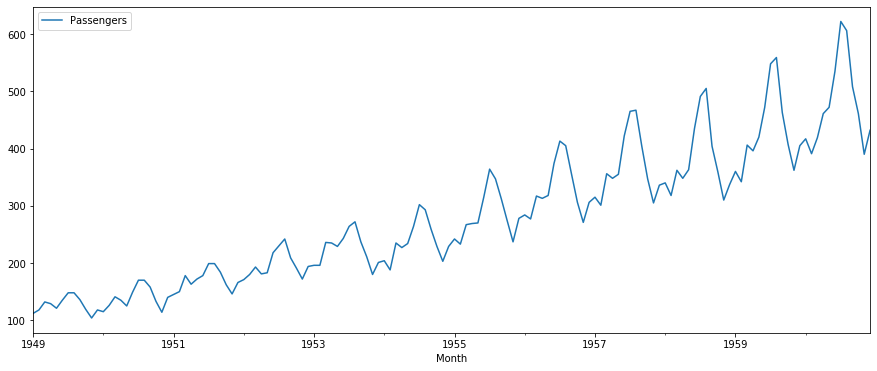

In [8]:
airline.plot()

In [9]:
# DETERMINING ROLLING STATISTICS
rollmean=airline.rolling(window=12).mean()
rollstd=airline.rolling(window=12).std()
print(rollmean,rollstd)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]             Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]


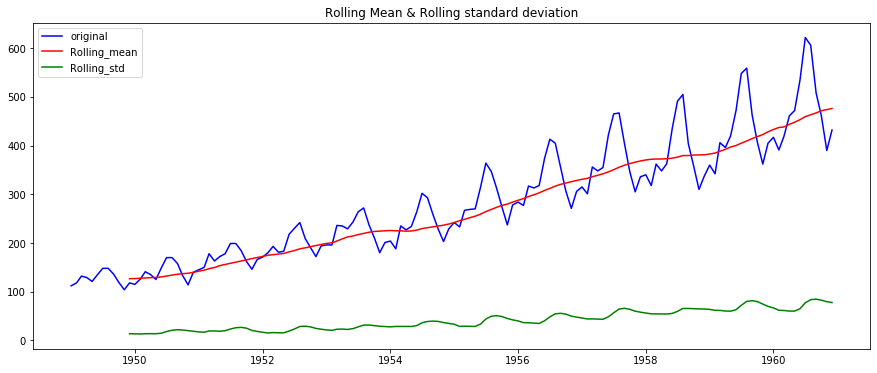

In [15]:
# plot rolling stats
orig=plt.plot(airline,color='blue',label='original')
mean=plt.plot(rollmean,color='red',label='Rolling_mean')
std=plt.plot(rollstd,color='green',label='Rolling_std')
plt.legend(loc='best')
plt.title('Rolling Mean & Rolling standard deviation')
plt.show()

In [16]:
# perform Dickey-Fuller test
#Ho: It is non stationary
#H1: It is stationary

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(airline['Passengers'])

def adfuller_test(X):
    result=adfuller(X)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
adfuller_test(airline['Passengers'])


ADF Test Statistic : 0.8153688792060456
p-value : 0.991880243437641
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


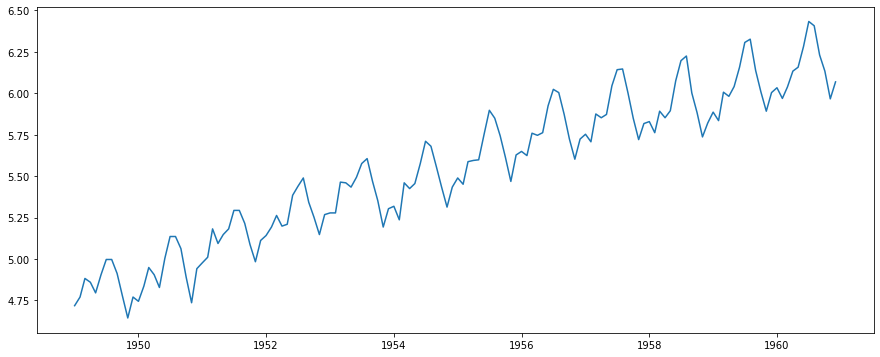

In [18]:
# Estimating the trend
airline_logscale=np.log(airline)
plt.plot(airline_logscale)

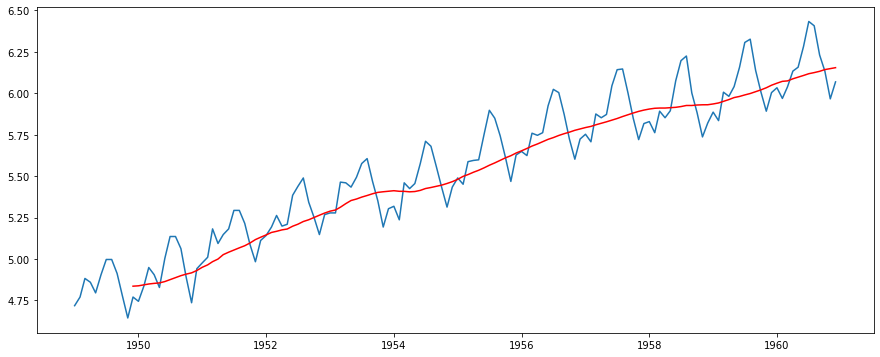

In [22]:
# Moving average to know the trend of the mean

movingAvg=airline_logscale.rolling(window=12).mean()
movingstd=airline_logscale.rolling(window=12).std()
plt.plot(airline_logscale)
plt.plot(movingAvg,color='red')


In [24]:
# Residuals
airline_logscaleMinusMovingAvg=airline_logscale-movingAvg
airline_logscaleMinusMovingAvg.head(12)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [26]:
airline_logscaleMinusMovingAvg.dropna(inplace=True)
airline_logscaleMinusMovingAvg.head(12)

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [29]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    # Rolling Statisics test
    
        movingAvg=timeseries.rolling(window=12).mean()
        movingstd=timeseries.rolling(window=12).std()
    
    # plot rolling stats
        orig=plt.plot(timeseries,color='blue',label='original')
        mean=plt.plot(movingAvg,color='red',label='Rolling_mean')
        std=plt.plot(movingstd,color='green',label='Rolling_std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Rolling standard deviation')
        plt.show()
        
    # Perform Dickey-Fuller test

        test_result=adfuller(timeseries['Passengers'])
        result=adfuller(timeseries['Passengers'])
        labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
        for value,label in zip(result,labels):
            print(label+' : '+str(value) )
        if result[1] <= 0.05:
            print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
        else:
            print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

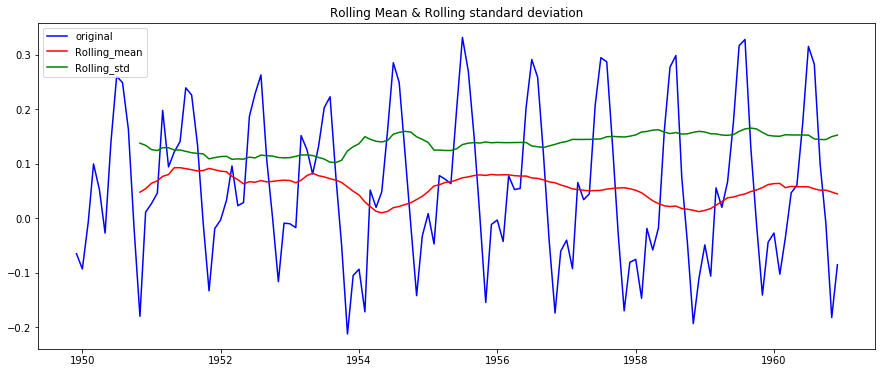

ADF Test Statistic : -3.162907991300844
p-value : 0.02223463000124475
#Lags Used : 13
Number of Observations Used : 119
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [30]:
test_stationarity(airline_logscaleMinusMovingAvg)

# here mean and std are stationary(constant) and no trend is seen

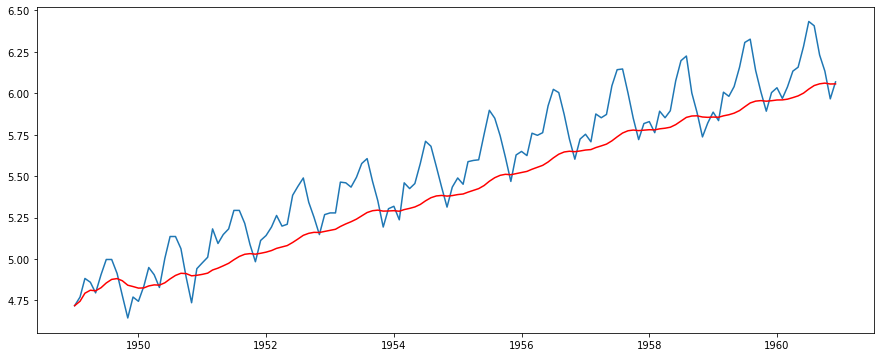

In [31]:
# check wheather the mean and std are stationary w.r.t exponential weighted average

exponentialDecayWeightedAvg=airline_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(airline_logscale)
plt.plot(exponentialDecayWeightedAvg,color='red')

# not stationary

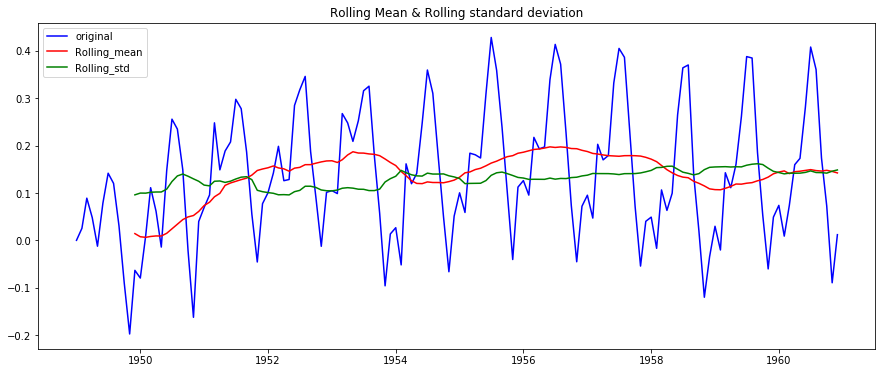

ADF Test Statistic : -3.6012624201616763
p-value : 0.005736938801511891
#Lags Used : 13
Number of Observations Used : 130
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [34]:
# convert weighted Average to stationary
airline_logscaleMinusExpWeigthAvg=airline_logscale-exponentialDecayWeightedAvg
test_stationarity(airline_logscaleMinusExpWeigthAvg)

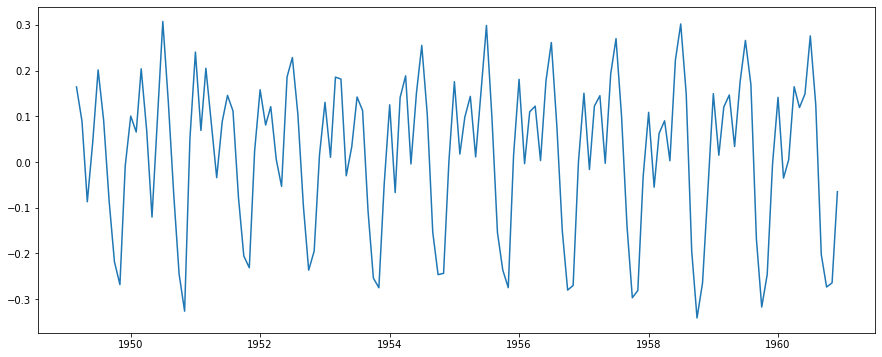

In [377]:
# check by further making it stationary by differencing 
airlineLogDiffShift=airline_logscale-airline_logscale.shift(2)
plt.plot(airlineLogDiffShift)

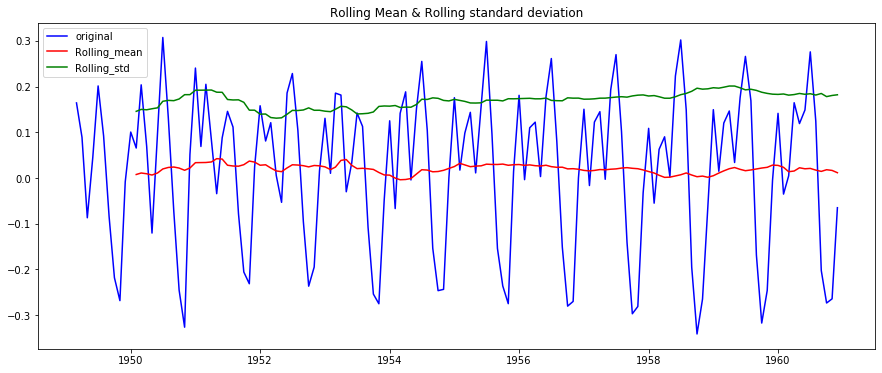

ADF Test Statistic : -3.1679073752887494
p-value : 0.02191911456403848
#Lags Used : 11
Number of Observations Used : 130
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [378]:
airlineLogDiffShift.dropna(inplace=True)
test_stationarity(airlineLogDiffShift)

# rolling mean and std looks very much constant

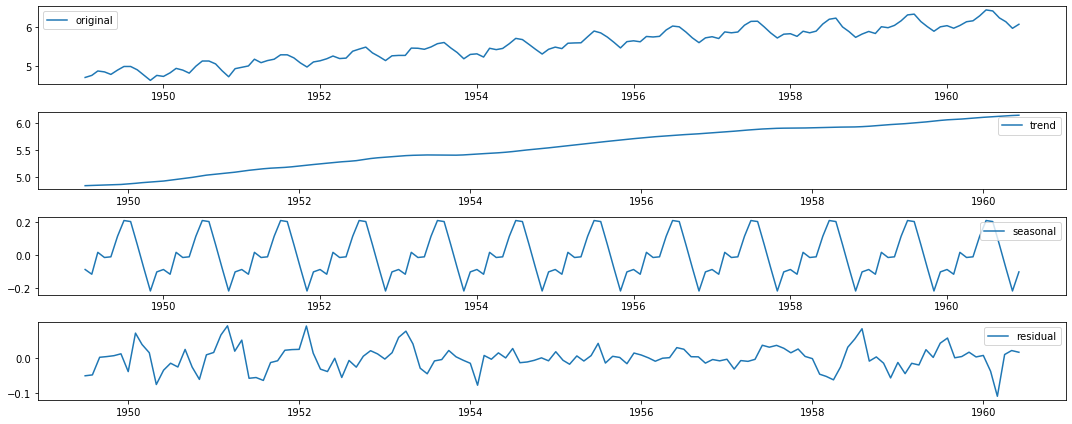

In [443]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(airline_logscale)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(airline_logscale,label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')
plt.tight_layout()



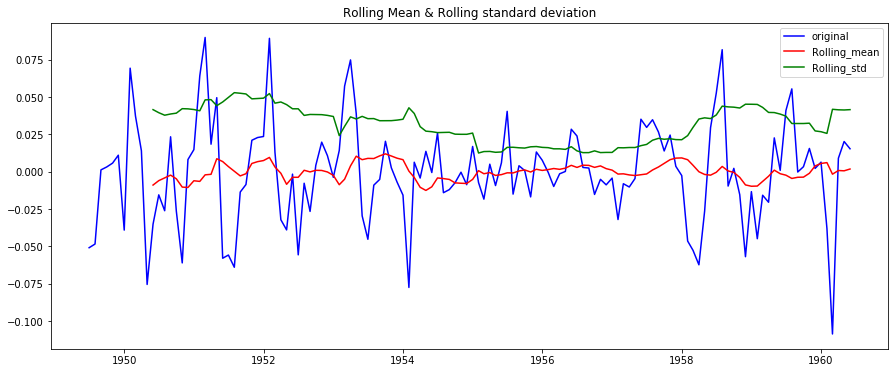

ADF Test Statistic : -6.332386797644877
p-value : 2.8850589033232202e-08
#Lags Used : 9
Number of Observations Used : 122
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [380]:
# residual logscale with rolling mean and rolling std
deomposedLogData=residual
deomposedLogData.dropna(inplace=True)


def test_stationarity_Decomposed(timeseries):
    # Rolling Statisics test
    
        movingAvg=timeseries.rolling(window=12).mean()
        movingstd=timeseries.rolling(window=12).std()
    
    # plot rolling stats
        orig=plt.plot(timeseries,color='blue',label='original')
        mean=plt.plot(movingAvg,color='red',label='Rolling_mean')
        std=plt.plot(movingstd,color='green',label='Rolling_std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Rolling standard deviation')
        plt.show()
        
    # Perform Dickey-Fuller test

        test_result=adfuller(timeseries)
        result=adfuller(timeseries)
        labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
        for value,label in zip(result,labels):
            print(label+' : '+str(value) )
        if result[1] <= 0.05:
            print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
        else:
            print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

test_stationarity_Decomposed(deomposedLogData)

# Moving mean and moving std is not stationary with residual plot(irregularity)
# we need to have rolling mean constant so that it smoothens out the noise and easily predict the values (p,q)

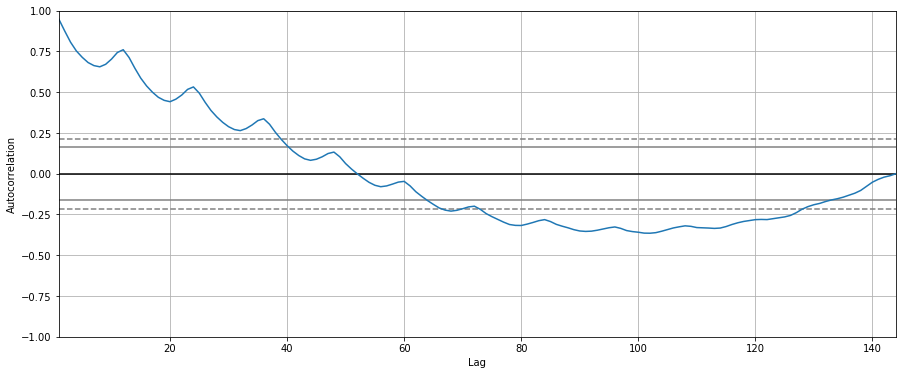

In [381]:
pd.plotting.autocorrelation_plot(airline['Passengers']);

# lag at which the line drops till upper confidence level

* Identification of an AR model is often best done with the PACF.
* For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
* Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q 
* p AR model lags 
* d differencing 
* q MA lags

E:\Program Files (x86)\Anaconda Phyton\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


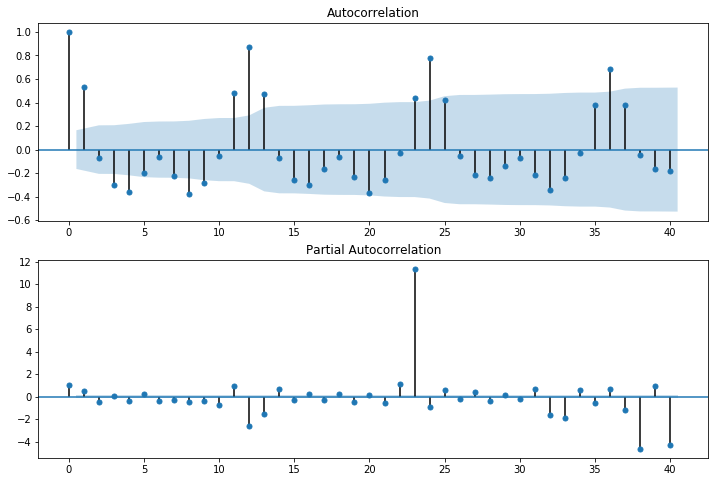

In [382]:
import statsmodels.api as sm
# ACF
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(airlineLogDiffShift,lags=40,ax=ax1)
# PACF
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(airlineLogDiffShift,lags=40,ax=ax2)

E:\Program Files (x86)\Anaconda Phyton\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\Program Files (x86)\Anaconda Phyton\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plotting MA model


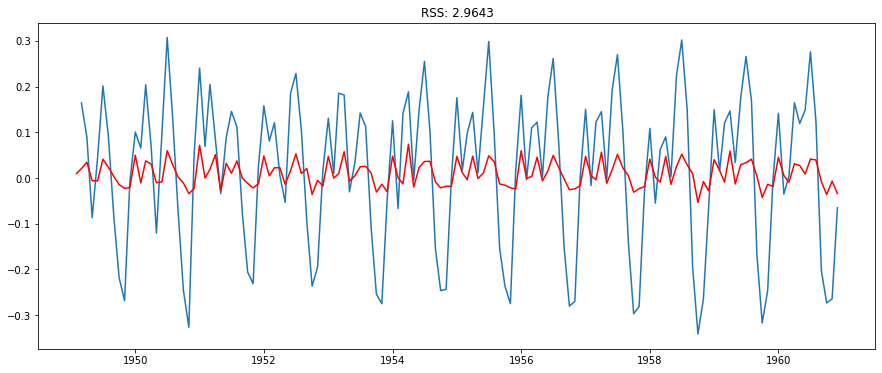

In [383]:
from statsmodels.tsa.arima_model import ARIMA

# p =0,q=1,d=1
model=ARIMA(airline_logscale,order=(0,1,1))
model_fit=model.fit()
plt.plot(airlineLogDiffShift)
plt.plot(model_fit.fittedvalues,color='red')
diff=((model_fit.fittedvalues-airlineLogDiffShift['Passengers'])**2).dropna()
RSS_MA=sum(diff)
RSS
plt.title('RSS: %.4f' % RSS_MA)
print('plotting MA model')

E:\Program Files (x86)\Anaconda Phyton\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
E:\Program Files (x86)\Anaconda Phyton\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plotting AR model


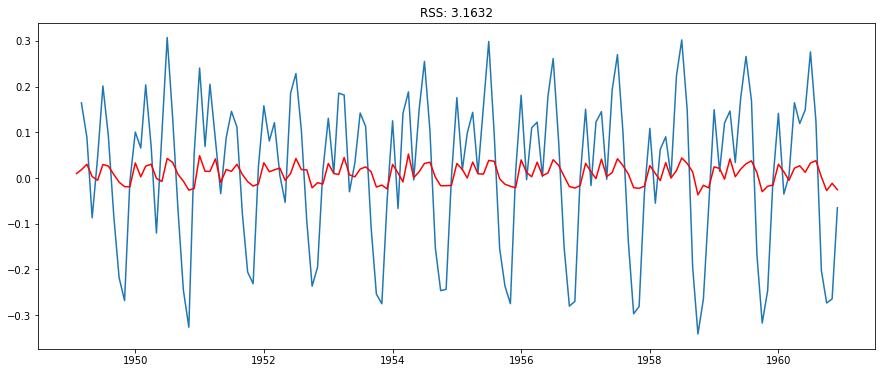

In [384]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(airline_logscale,order=(1,1,0))
model_fit=model.fit()
plt.plot(airlineLogDiffShift)
plt.plot(model_fit.fittedvalues,color='red')
diff=((model_fit.fittedvalues-airlineLogDiffShift['Passengers'])**2).dropna()
RSS_AR=sum(diff)

plt.title('RSS: %.4f' % RSS_AR)
print('plotting AR model')

plotting ARIMA model


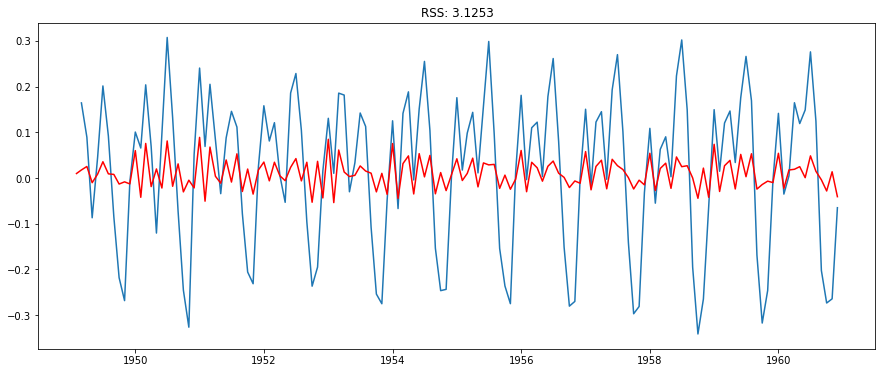

In [639]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(airline_logscale,order=(1,1,1))
results_ARIMA=model.fit()
plt.plot(airlineLogDiffShift)
plt.plot(results_ARIMA.fittedvalues,color='red')
diff=((results_ARIMA.fittedvalues-airlineLogDiffShift['Passengers'])**2).dropna()
RSS_ARIMA=sum(diff)

plt.title('RSS: %.4f' % RSS_ARIMA)
print('plotting ARIMA model')


## Data Tranformation to Original form

In [640]:
# convert predicted (log) to series
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff

Month
1949-02-01    0.009800
1949-03-01    0.017618
1949-04-01    0.025229
1949-05-01   -0.010225
1949-06-01    0.008528
                ...   
1960-08-01    0.014654
1960-09-01   -0.003923
1960-10-01   -0.028363
1960-11-01    0.013642
1960-12-01   -0.040849
Length: 143, dtype: float64

In [641]:
# convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum

Month
1949-02-01    0.009800
1949-03-01    0.027418
1949-04-01    0.052648
1949-05-01    0.042422
1949-06-01    0.050950
                ...   
1960-08-01    1.413108
1960-09-01    1.409185
1960-10-01    1.380822
1960-11-01    1.394465
1960-12-01    1.353615
Length: 143, dtype: float64

In [642]:
# add predicted log cumsum (with seasonal differencing) to acutal predicted log value without differcing
predictions_ARIMA_log = pd.Series(airline_logscale['Passengers'].iloc[0], index=airline_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728299
1949-03-01    4.745917
1949-04-01    4.771146
1949-05-01    4.760921
dtype: float64

Text(0.5, 1.0, 'RMSE: 52.4891')

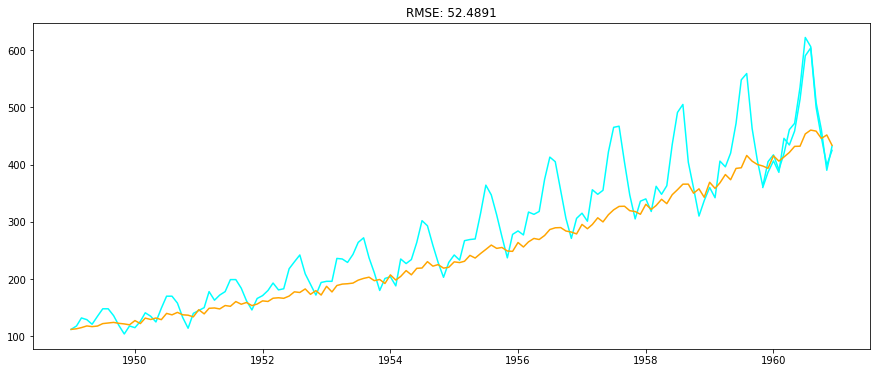

In [643]:
# convert to original value by taking exponential

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(airline,color='cyan')
plt.plot(predictions_ARIMA,color='orange')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-airline['Passengers'])**2)/len(airline['Passengers'])))

# predicted value captures the better trend but not clear seasonality

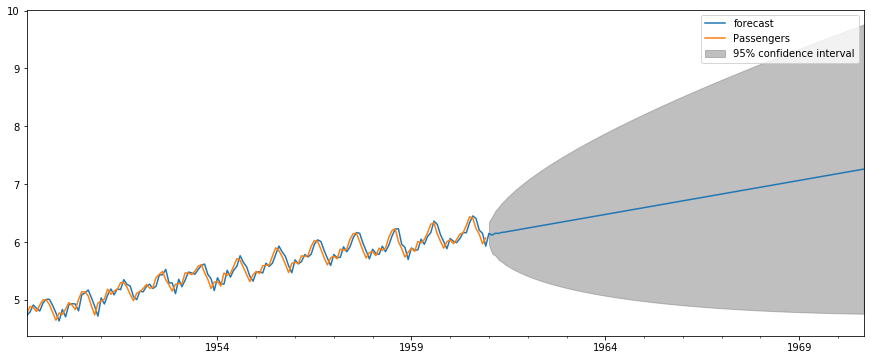

In [644]:
results_ARIMA.plot_predict(1,260)
x=results_ARIMA.forecast(steps=120)


In [645]:
x

(array([6.14603749, 6.11633067, 6.14914715, 6.1455379 , 6.16315008,
        6.16839876, 6.18085036, 6.18910558, 6.19980558, 6.20908126,
        6.21918675, 6.2288088 , 6.23871249, 6.2484521 , 6.25828731,
        6.26806682, 6.27787878, 6.28767183, 6.2974759 , 6.30727355,
        6.31707494, 6.32687415, 6.33667463, 6.34647438, 6.35627455,
        6.36607447, 6.37587454, 6.38567452, 6.39547455, 6.40527456,
        6.41507458, 6.42487459, 6.4346746 , 6.44447461, 6.45427463,
        6.46407464, 6.47387466, 6.48367467, 6.49347468, 6.5032747 ,
        6.51307471, 6.52287473, 6.53267474, 6.54247475, 6.55227477,
        6.56207478, 6.57187479, 6.58167481, 6.59147482, 6.60127484,
        6.61107485, 6.62087486, 6.63067488, 6.64047489, 6.65027491,
        6.66007492, 6.66987493, 6.67967495, 6.68947496, 6.69927497,
        6.70907499, 6.718875  , 6.72867502, 6.73847503, 6.74827504,
        6.75807506, 6.76787507, 6.77767509, 6.7874751 , 6.79727511,
        6.80707513, 6.81687514, 6.82667515, 6.83

In [646]:
# create a comparison dataframe
compare_df = pd.concat([airline['Passengers'],predictions_ARIMA], axis=1)
compare_df.rename(columns={0 :'Predictions_ARIMA'},inplace=True)

In [647]:
compare_df.sample(12)

,Passengers,Predictions_ARIMA
Month,,
1952-06-01,218,170.231238
1958-02-01,318,321.649993
1950-07-01,170,139.929188
1951-07-01,199,152.343316
1960-06-01,535,432.040777
1960-02-01,391,405.992838
1955-06-01,315,244.599283
1952-05-01,183,166.300847
1955-12-01,278,248.337497


In [648]:
from sklearn.metrics import r2_score

r2 = r2_score(compare_df['Passengers'],compare_df['Predictions_ARIMA'])
r2

0.807227185560014

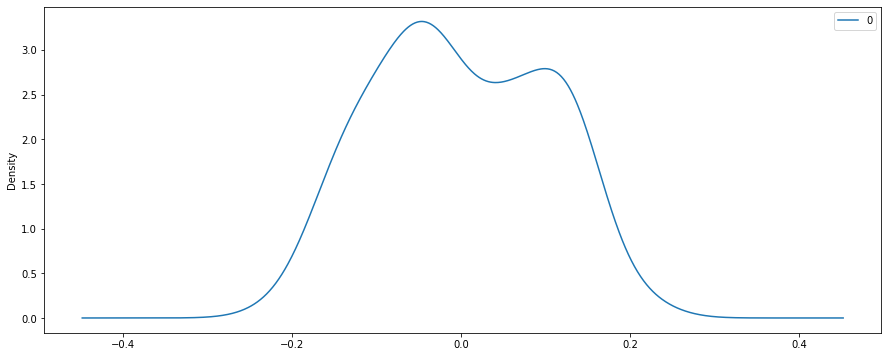

                0
count  143.000000
mean    -0.000026
std      0.101389
min     -0.223351
25%     -0.078643
50%     -0.009057
75%      0.089547
max      0.227127


In [649]:
import matplotlib.pyplot as plt
residuals_ = DataFrame(results_ARIMA.resid)
residuals_.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals_.describe())

Conclusion : Mean approches to 0 and standart deviation tends to approach 1

In [650]:
results_ARIMA.summary() # AIC =-241

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 124.804
Method:                       css-mle   S.D. of innovations              0.101
Date:                Mon, 28 Dec 2020   AIC                           -241.608
Time:                        16:52:39   BIC                           -229.756
Sample:                    02-01-1949   HQIC                          -236.792
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0098      0.010      0.993      0.321      -0.010       0.029
ar.L1.D.Passengers    -0.5826      0.128     -4.536      0.000      -0.834      -0.331
ma.L1.D.Passengers     0.8502      0.086      9.936      0.000       0.682       1.018
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7165           +0.0000j            1.7165            0.5000
MA.1           -1.1762           +0.0000j            1.1762            0.5000
-----------------------------------------------------------------------------
"""

## SARIMA - Seasonal ARIMA Model

In [658]:
model=sm.tsa.statespace.SARIMAX(airline['Passengers'],order=(1, 1, 1),seasonal_order=(2,1,0,12))
results=model.fit()

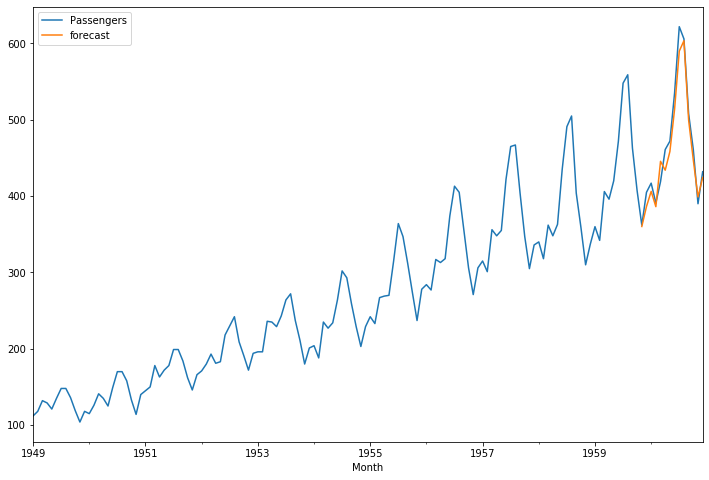

In [659]:
airline['forecast']=results.predict(start=130,end=180,dynamic=True)
airline[['Passengers','forecast']].plot(figsize=(12,8))

In [660]:
from pandas.tseries.offsets import DateOffset
future_dates=[airline.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [661]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=airline.columns)
future_datest_df.tail()


,Passengers,forecast
1962-07-01,NaN,NaN
1962-08-01,NaN,NaN
1962-09-01,NaN,NaN
1962-10-01,NaN,NaN
1962-11-01,NaN,NaN


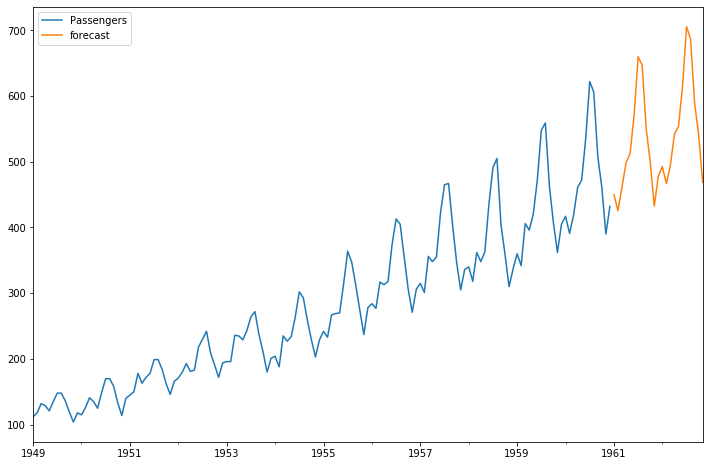

In [662]:
future_df=pd.concat([airline,future_datest_df])

future_df['forecast'] = results.predict(start = 144, end = 200, dynamic= True)  
future_df[['Passengers', 'forecast']].plot(figsize=(12, 8))

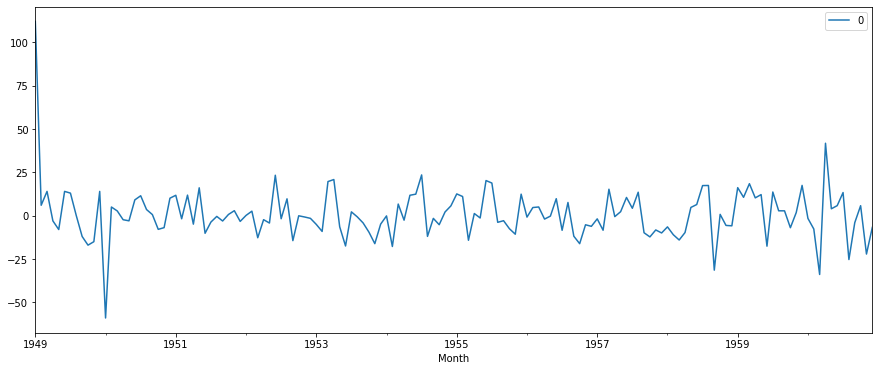

In [663]:
residuals_SARIMA = DataFrame(results.resid)
residuals_SARIMA.plot()
pyplot.show()

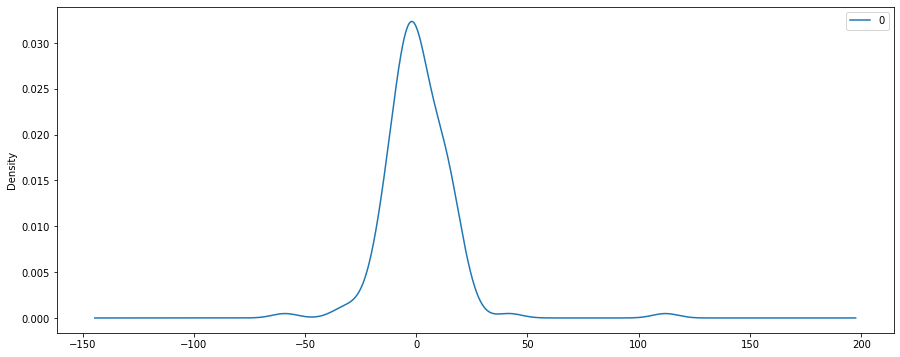

                0
count  144.000000
mean     0.746492
std     15.554595
min    -59.002212
25%     -6.915127
50%     -0.615773
75%      9.726644
max    112.000000


In [664]:
residuals_SARIMA.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals_SARIMA.describe())

In [665]:
# Performance Matrix

results.summary()  # SARIMA model AIC =1022


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.516
Date:                             Mon, 28 Dec 2020   AIC                           1021.032
Time:                                     17:12:12   BIC                           1035.408
Sample:                                 01-01-1949   HQIC                          1026.874
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1877      0.337     -0.558      0.577      -0.847       0.472
ma.L1         -0.1765      0.309     -0.570      0.568      -0.783       0.430
ar.S.L12      -0.1207      0.092     -1.313      0.189      -0.301       0.060
ar.S.L24       0.1948      0.107      1.825      0.068      -0.014       0.404
sigma2       130.2883     15.358      8.483      0.000     100.187     160.389
===================================================================================
Ljung-Box (Q):                       52.68   Jarque-Bera (JB):                 5.78
Prob(Q):                              0.09   Prob(JB):                         0.06
Heteroskedasticity (H):               2.63   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [666]:
def mean_abs_pct_error(Passengers, forecast):
    err=0
    for i in range(len(forecast)):
        err += np.abs(Passengers.values[i] - forecast.values[i])/Passengers.values[i]
    return err[0] * 100/len(forecast) 

In [667]:
def mean_abs_error(Passengers, forecast):
    err=0
    for i in range(len(forecast)):
        err += np.abs(Passengers.values[i] - forecast.values[i])
    return err[0] /len(forecast) 

In [668]:
preds_best=np.exp(results_ARIMA.predict(start=13, dynamic=True, typ='levels'))
print("MAPE {} % ".format(np.round(mean_abs_pct_error(airline,preds_best),2)))
print("MAE:{}".format(np.round(mean_abs_error(airline,preds_best),2)))


MAPE 13.41 % 
MAE:39.23


In [669]:
preds_best=results.predict(start=13, dynamic=True, typ='levels')
print("MAPE {} % ".format(np.round(mean_abs_pct_error(airline,preds_best),2)))

MAPE 38.09 % 


### Grid Search ARIMA hyper parameters

In [670]:
from pmdarima import auto_arima 

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

stepwise_fit = auto_arima(airlineLogDiffShift, start_p = 1, 
                          start_q = 1,max_p = 3, max_q = 3, 
                          m = 12, start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True, 
                          error_action ='ignore', 
                          # we don't want to know if an order does not work 
                          suppress_warnings = True, 
                          # we don't want convergence warnings
                          information_criterion='aic',
                          stepwise = True) # set to stepwise 

# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-467.383, Time=2.68 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-393.221, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-428.672, Time=0.64 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-453.481, Time=1.65 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-395.215, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-461.964, Time=1.69 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=-465.546, Time=4.55 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=inf, Time=1.83 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=-463.637, Time=4.93 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-434.145, Time=0.89 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=-465.746, Time=2.46 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-462.842, Time=2.26 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-425.187, Time=0.61 sec
 ARIMA(0,0,2)(0,1,1)[12] inte

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  142
Model:             SARIMAX(0, 0, 2)x(0, 1, [1], 12)   Log Likelihood                 239.515
Date:                              Mon, 28 Dec 2020   AIC                           -471.031
Time:                                      17:13:42   BIC                           -459.561
Sample:                                           0   HQIC                          -466.370
                                              - 142                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5671      0.083      6.812      0.000       0.404       0.730
ma.L2         -0.4024      0.103     -3.892      0.000      -0.605      -0.200
ma.S.L12      -0.5500      0.098     -5.607      0.000      -0.742      -0.358
sigma2         0.0014      0.000      8.751      0.000       0.001       0.002
===================================================================================
Ljung-Box (Q):                       37.71   Jarque-Bera (JB):                 1.23
Prob(Q):                              0.57   Prob(JB):                         0.54
Heteroskedasticity (H):               0.59   Skew:                            -0.01
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [671]:
best_results=stepwise_fit
ARIMA_model2=best_results.summary()


In [672]:
best_results

ARIMA(order=(0, 0, 2), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

plotting ARIMA model


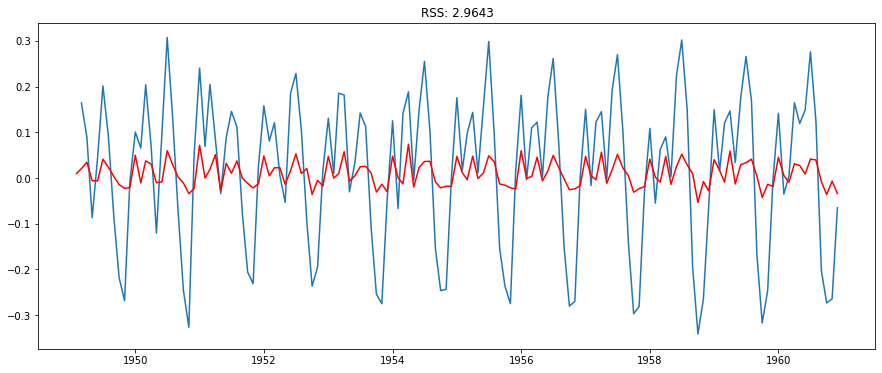

In [516]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(airline_logscale,order=(0,1,1))
best_results=model.fit()
plt.plot(airlineLogDiffShift)
plt.plot(best_results.fittedvalues,color='red')
diff=((best_results.fittedvalues-airlineLogDiffShift['Passengers'])**2).dropna()
RSS_ARIMA=sum(diff)
plt.title('RSS: %.4f' % RSS_ARIMA)
print('plotting ARIMA model')

In [517]:
preds_best2=np.exp(best_results.predict(start=13, dynamic=True, typ='levels'))
print("MAPE {} % ".format(np.round(mean_abs_pct_error(airline,preds_best2),2)))
print("MAE:{}".format(np.round(mean_abs_error(airline,preds_best2),2)))

MAPE 13.05 % 
MAE:38.28
